In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}	
mpl.rc('font', **font)

In [3]:
df = pd.read_csv("./bases/suicide/master.csv") 
filtro = df.year > 1999
filtro2 = df.year < 2016
df = df[filtro & filtro2]
year = pd.period_range('2000', '2015', freq='Y')
df = df.groupby(['country','year','sex'], as_index=False)['suicides_no','population'].sum()
df = df.set_index(['country','year','sex'])
df = df.reindex( pd.MultiIndex.from_product([df.index.levels[0],df.index.levels[1],df.index.levels[2]], names=['country', 'year','sex']),fill_value=np.nan).reset_index()
func = lambda x:x.suicides_no.isna()
series = df[func].reset_index().groupby(['country'])['year'].count()
lista = list(series[series > 10].index)
filtro3 = df.country.isin(lista)
df = df[~filtro3]
df

,country,year,sex,suicides_no,population
0,Albania,2000,female,16.0,1372400.0
1,Albania,2000,male,38.0,1423900.0
2,Albania,2001,female,35.0,1408730.0
3,Albania,2001,male,84.0,1390619.0
4,Albania,2002,female,42.0,1418737.0
5,Albania,2002,male,91.0,1400102.0
6,Albania,2003,female,51.0,1431674.0
7,Albania,2003,male,73.0,1412255.0
8,Albania,2004,female,57.0,1447609.0
9,Albania,2004,male,89.0,1427382.0


In [12]:
filtrom = df.sex == 'male'
dfm = df[filtrom]
dfmales = dfm.pivot_table('suicides_no', ['country'], 'year')
dfmales = dfmales.interpolate(method='linear',limit_direction='both', axis=1)
dfmales = pd.melt(dfmales.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="suicides")
dfmalep = dfm.pivot_table('population', ['country'], 'year')
dfmalep = dfmalep.interpolate(method='linear',limit_direction='both', axis=1)
dfmalep = pd.melt(dfmalep.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="population")
dfmale = dfmalep.merge(dfmales).sort_values(['country','year']).reset_index(drop=True)
dfmale['suicide100'] = (dfmale['suicides'] * 100000 ) / dfmale['population']

,country,year,population,suicides,suicide100
0,Albania,2000,1.423900e+06,38.0,2.668727
1,Albania,2001,1.390619e+06,84.0,6.040476
2,Albania,2002,1.400102e+06,91.0,6.499526
3,Albania,2003,1.412255e+06,73.0,5.169038
4,Albania,2004,1.427382e+06,89.0,6.235191
5,Albania,2005,1.383392e+06,0.0,0.000000
6,Albania,2006,1.382667e+06,0.0,0.000000
7,Albania,2007,1.378492e+06,77.0,5.585814
8,Albania,2008,1.372386e+06,99.0,7.213714
9,Albania,2009,1.367676e+06,0.0,0.000000


In [24]:
dfmalew = dfmale.groupby('year').agg(np.sum).reset_index()
dfmalew['suicide100'] = (dfmalew['suicides'] * 100000 ) / dfmalew['population']
dfmalew

,year,population,suicides,suicide100
0,2000,8.312757e+08,195729.000000,23.545618
1,2001,8.367844e+08,196781.000000,23.516332
2,2002,8.423710e+08,196127.333333,23.282773
3,2003,8.491915e+08,195827.166667,23.060426
4,2004,8.554081e+08,191195.916667,22.351426
5,2005,8.613928e+08,187217.333333,21.734257
6,2006,8.679854e+08,180856.250000,20.836323
7,2007,8.732537e+08,179544.000000,20.560347
8,2008,8.787458e+08,181015.000000,20.599246
9,2009,8.857012e+08,185985.000000,20.998618


In [16]:
filtrom = df.sex == 'female'
dff = df[filtrom]
dffemales = dff.pivot_table('suicides_no', ['country'], 'year')
dffemales = dffemales.interpolate(method='linear',limit_direction='both', axis=1)
dffemales = pd.melt(dffemales.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="suicides")
dffemalep = dff.pivot_table('population', ['country'], 'year')
dffemalep = dffemalep.interpolate(method='linear',limit_direction='both', axis=1)
dffemalep = pd.melt(dffemalep.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="population")
dffemale = dffemalep.merge(dffemales).sort_values(['country','year']).reset_index(drop=True)
dffemale['suicide100'] = (dffemale['suicides'] * 100000 ) / dfmale['population']

In [20]:
dffemalew = dffemale.groupby('year').agg(np.sum).reset_index()
dffemalew['suicide100'] = (dffemalew['suicides'] * 100000 ) / dffemalew['population']
dffemalew

,year,population,suicides,suicide100
0,2000,8.749476e+08,53644.000000,6.131110
1,2001,8.810506e+08,52801.000000,5.992959
2,2002,8.867645e+08,54342.000000,6.128121
3,2003,8.944821e+08,54284.500000,6.068819
4,2004,9.010107e+08,53999.166667,5.993177
5,2005,9.069647e+08,53223.333333,5.868292
6,2006,9.138636e+08,51789.500000,5.667093
7,2007,9.183926e+08,53195.000000,5.792185
8,2008,9.238880e+08,53886.500000,5.832580
9,2009,9.303498e+08,54098.000000,5.814802


Text(0, 0.5, 'suicidio por 100.000')

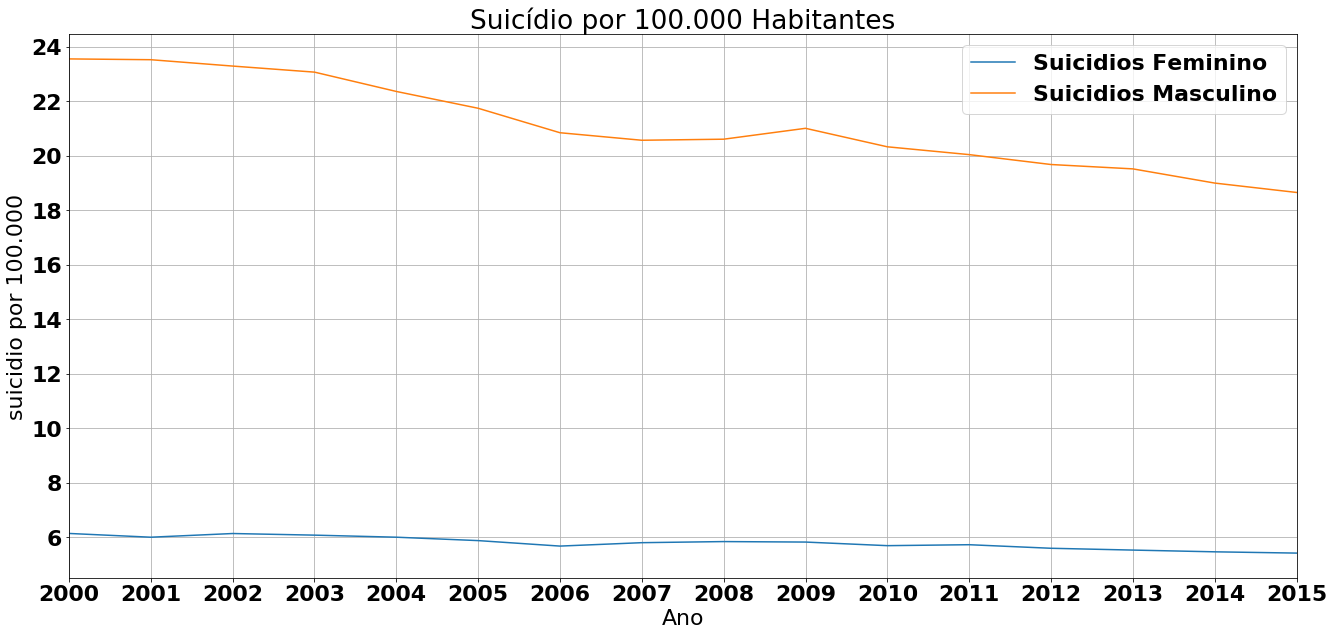

In [71]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Suicídio por 100.000 Habitantes")
dffemalew.plot(x='year', y='suicide100', ax=ax, grid=True,yticks=range(24,5,-2),label='Suicidios Feminino')
dfmalew.plot(x='year', y='suicide100', ax=ax, grid=True,xticks=range(2000,2016), label='Suicidios Masculino')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")